# <font color = brown>Problem Statement
---

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 
The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 
Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

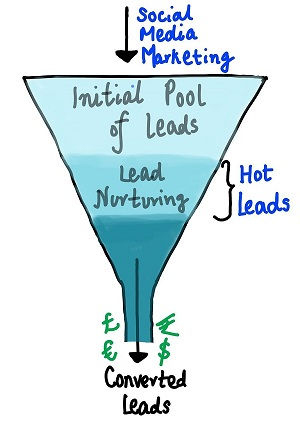

---

As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## <font color = brown>Data
---
You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out for are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).

## <font color = brown>Goals of the Case Study
#### There are quite a few goals for this case study.
---

1.Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

2.There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

## <font color = brown>Results Expected

-  A well-commented Jupyter note with at least the logistic regression model, the conversion predictions and evaluation metrics.
-  The word document filled with solutions to all the problems.
-  The overall approach of the analysis in a presentation.
   -    Mention the problem statement and the analysis approach briefly 
   -    Explain the results in business terms
   -    Include visualisations and summarise the most important results in the presentation
-  A brief summary report in 500 words explaining how you proceeded with the assignment and the learnings that you gathered.

##  <font color = green> Reading and Understanding of the Dataset

#### Importing Libraries

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading Dataset
lead_Aj = pd.read_csv('leads.csv')

In [3]:
# Inspecting 1st 5 row's of dataset
lead_Aj.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [4]:
# Inpecting last 5 row's of dataset
lead_Aj.tail()

Prospect ID  Lead Number  \
9235  19d6451e-fcd6-407c-b83b-48e1af805ea9       579564   
9236  82a7005b-7196-4d56-95ce-a79f937a158d       579546   
9237  aac550fe-a586-452d-8d3c-f1b62c94e02c       579545   
9238  5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9       579538   
9239  571b5c8e-a5b2-4d57-8574-f2ffb06fdeff       579533   

                  Lead Origin     Lead Source Do Not Email Do Not Call  \
9235  Landing Page Submission  Direct Traffic          Yes          No   
9236  Landing Page Submission  Direct Traffic           No          No   
9237  Landing Page Submission  Direct Traffic          Yes          No   
9238  Landing Page Submission          Google           No          No   
9239  Landing Page Submission  Direct Traffic           No          No   

      Converted  TotalVisits  Total Time Spent on Website  \
9235          1          8.0                         1845   
9236          0          2.0                          238   
9237          0          2.0                          199   
9238          1          3.0                          499   
9239          1          6.0                         1279   

      Page Views Per Visit  ... Get updates on DM Content    Lead Profile  \
9235                  2.67  ...                        No  Potential Lead   
9236                  2.00  ...                        No  Potential Lead   
9237                  2.00  ...                        No  Potential Lead   
9238                  3.00  ...                        No             NaN   
9239                  3.00  ...                        No  Potential Lead   

                    City Asymmetrique Activity Index  \
9235              Mumbai                   02.Medium   
9236              Mumbai                   02.Medium   
9237              Mumbai                   02.Medium   
9238  Other Metro Cities                   02.Medium   
9239        Other Cities                   02.Medium   

     Asymmetrique Profile Index Asymmetrique Activity Score  \
9235                    01.High                        15.0   
9236                    01.High                        14.0   
9237                    01.High                        13.0   
9238                  02.Medium                        15.0   
9239                    01.High                        15.0   

     Asymmetrique Profile Score I agree to pay the amount through cheque  \
9235                       17.0                                       No   
9236                       19.0                                       No   
9237                       20.0                                       No   
9238                       16.0                                       No   
9239                       18.0                                       No   

     A free copy of Mastering The Interview Last Notable Activity  
9235                                     No     Email Marked Spam  
9236                                    Yes              SMS Sent  
9237                                    Yes              SMS Sent  
9238                                     No              SMS Sent  
9239                                    Yes              Modified  

[5 rows x 37 columns]

In [5]:
# Inspecting the shape of data set
lead_Aj.shape

(9240, 37)

In [6]:
# lets look at the statistical data
lead_Aj.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [7]:
# Checking types of columns and null values in  in dataset 
lead_Aj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

It appears that this dataset has a significant number of category variables, for which we will need to build dummy variables. Additionally, there are numerous null values, so we must deal them appropriately.

##  <font color = green>Data Cleaning and Preperation

In [8]:
# Checking missing values Dataset
(lead_Aj.isnull().sum()/lead_Aj.shape[1])*100

Prospect ID                                          0.000000
Lead Number                                          0.000000
Lead Origin                                          0.000000
Lead Source                                         97.297297
Do Not Email                                         0.000000
Do Not Call                                          0.000000
Converted                                            0.000000
TotalVisits                                        370.270270
Total Time Spent on Website                          0.000000
Page Views Per Visit                               370.270270
Last Activity                                      278.378378
Country                                           6651.351351
Specialization                                    3886.486486
How did you hear about X Education                5964.864865
What is your current occupation                   7270.270270
What matters most to you in choosing a course     7321.621622
Search  

As you can see, many columns have a significant number of missing values. These columns are obviously useless. Since our dataframe contains 9000 datapoints, let's remove the columns with more than 3000 missing values because they are useless to us.

In [9]:
# Dropping columns which has missing values above 3000
for col in lead_Aj:
    if lead_Aj[col].isnull().sum()> 3000:
        lead_Aj.drop(col, 1, inplace = True)

In [10]:
# Checking null or missing values in terms of percentage
round((lead_Aj.isnull().sum()/len(lead_Aj.index))*100, 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

We will drop `city` and `country` as its not of that use

In [11]:
lead_Aj.drop(['City','Country'], 1, inplace = True)

In [12]:
lead_Aj['Lead Profile'].astype('category').value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

Remember that some of the columns had a level that reads "Select"? That level simply indicates that the student did not choose the choice for that particular column, which is why it says "Select" in those columns. These values are equivalent to missing values, thus we must determine the level "Select" value counts over all of the columns in which they are present.

---

In [13]:
# Getting value caounts for every feature availabe
for column in lead_Aj:
    print(lead_Aj[column].astype('category').value_counts())
    print("__")

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
__
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
__
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
__
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference

In [14]:
# Below are the columns which has 'Select' 
print(lead_Aj['Lead Profile'].astype('category').value_counts())


Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64


In [15]:
print(lead_Aj['How did you hear about X Education'].astype('category').value_counts())

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64


In [16]:
print(lead_Aj['Specialization'].astype('category').value_counts())

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64


In above `2` columns the value counts of `select` is very high and its of no use for our analysis better we should drop it

In [17]:
lead_Aj.drop(['How did you hear about X Education','Lead Profile'], 1, inplace= True)

---
Also note that when you received the value counts for all the columns, some of them had only one value that predominated among all the data points. Included in this list are the phrases "Do Not Call," "Search," "Magazine," "Newspaper Article," "X Education Forums," "Newspaper," "Digital Advertisement," "Through Recommendations," "Receive More Updates About Our Courses," "Update me on Supply Chain Content," "Get updates on DM Content," and "I agree to pay the amount through check." Since almost every result for these variables is "No," it is better to remove these columns because they won't be useful for our study.

---

In [18]:
# Dropping unnecessary columns
lead_Aj.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque','What matters most to you in choosing a course'],axis=1, inplace = True)

In [19]:
# Checking null values AGain
lead_Aj.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

The column labelled "What is your present occupation" currently has a large number of null responses. You can now remove the entire row, but we decide not to since we have already lost so many feature variables and it might be important in the analysis. The null rows for the column "What is your present occupation" can now be removed.

In [20]:
lead_Aj =lead_Aj[~lead_Aj['What is your current occupation'].isnull()]

In [21]:
lead_Aj.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                36
Do Not Email                                0
Converted                                   0
TotalVisits                               130
Total Time Spent on Website                 0
Page Views Per Visit                      130
Last Activity                             103
Specialization                             18
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

From above we can get that the null value present in coulmns are very less what we will do is drop the these rows from the columns

In [22]:
lead_Aj = lead_Aj[~lead_Aj['TotalVisits'].isnull()]

In [23]:
lead_Aj.isnull().sum()

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                               29
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [24]:
lead_Aj = lead_Aj[~lead_Aj['Lead Source'].isnull()]

In [25]:
lead_Aj.isnull().sum()

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [26]:
lead_Aj = lead_Aj[~lead_Aj['Specialization'].isnull()]

In [27]:
lead_Aj.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

Now, our dataset does not have any missing value nd we dropped some rows too, lets check the shape of dataset

In [28]:
lead_Aj.shape

(6373, 14)

In [29]:
len(lead_Aj.index)

6373

In [30]:
# lets check % of the row wd original dataset which have got at 1st
len(lead_Aj.index)/9240

0.6897186147186147

Thus, we have alomot `69%` of rows which appears to good for Analysis`m

In [31]:
# lets have look at dataset again
lead_Aj.head(10)

Prospect ID  Lead Number  \
0   7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737   
1   2a272436-5132-4136-86fa-dcc88c88f482       660728   
2   8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727   
3   0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719   
4   3256f628-e534-4826-9d63-4a8b88782852       660681   
6   9fae7df4-169d-489b-afe4-0f3d752542ed       660673   
10  2a369e35-ca95-4ca9-9e4f-9d27175aa320       660608   
11  9bc8ce93-6144-49e0-9f9d-080fc980f83c       660570   
12  8bf76a52-2478-476b-8618-1688e07874ad       660562   
13  88867067-3750-4753-8d33-1c7d1db53b5e       660558   

                Lead Origin     Lead Source Do Not Email  Converted  \
0                       API      Olark Chat           No          0   
1                       API  Organic Search           No          0   
2   Landing Page Submission  Direct Traffic           No          1   
3   Landing Page Submission  Direct Traffic           No          0   
4   Landing Page Submission          Google           No          1   
6   Landing Page Submission          Google           No          1   
10  Landing Page Submission  Organic Search           No          1   
11  Landing Page Submission  Direct Traffic           No          1   
12                      API  Organic Search           No          1   
13  Landing Page Submission  Organic Search           No          0   

    TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0           0.0                            0                  0.00   
1           5.0                          674                  2.50   
2           2.0                         1532                  2.00   
3           1.0                          305                  1.00   
4           2.0                         1428                  1.00   
6           2.0                         1640                  2.00   
10          8.0                         1351                  8.00   
11          8.0                         1343                  2.67   
12         11.0                         1538                 11.00   
13          5.0                          170                  5.00   

              Last Activity             Specialization  \
0   Page Visited on Website                     Select   
1              Email Opened                     Select   
2              Email Opened    Business Administration   
3               Unreachable      Media and Advertising   
4         Converted to Lead                     Select   
6              Email Opened    Supply Chain Management   
10             Email Opened         Travel and Tourism   
11  Page Visited on Website  Human Resource Management   
12             Email Opened       Marketing Management   
13             Email Opened    Business Administration   

   What is your current occupation A free copy of Mastering The Interview  \
0                       Unemployed                                     No   
1                       Unemployed                                     No   
2                          Student                                    Yes   
3                       Unemployed                                     No   
4                       Unemployed                                     No   
6                       Unemployed                                     No   
10                      Unemployed                                    Yes   
11                      Unemployed                                    Yes   
12                      Unemployed                                     No   
13                      Unemployed                                    Yes   

      Last Notable Activity  
0                  Modified  
1              Email Opened  
2              Email Opened  
3                  Modified  
4                  Modified  
6                  Modified  
10             Email Opened  
11  Page Visited on Website  
12                 Modified  
13             Email Opened

`Prospect ID`, `Lead Number` wont be of any use for Analyis Part, thus we will drop it

In [32]:
lead_Aj.drop(['Prospect ID', 'Lead Number'], 1, inplace= True)

In [33]:
# lets have look at dataset again
lead_Aj.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Select   
1             Email Opened                   Select   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Select   

  What is your current occupation A free copy of Mastering The Interview  \
0                      Unemployed                                     No   
1                      Unemployed                                     No   
2                         Student                                    Yes   
3                      Unemployed                                     No   
4                      Unemployed                                     No   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

## <font color = green> Preparing the Data For Model Building

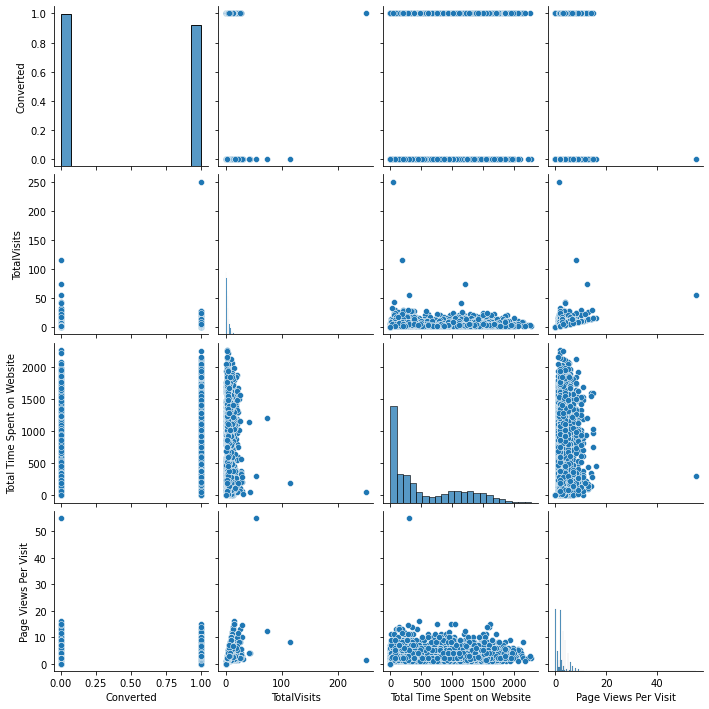

In [34]:
sns.pairplot(lead_Aj)
plt.show()

---
1.Page Views per value and Total Time Spent on websites has less correlation  between them cause at certain point it stopped and moved lengthwise not   diagonaly.<br>
2.Toatl time spent on website, Total visits and Page views per visit has same similar relation qualtitatvely but not Quantitatively. <br>
3.Total visits and page views per visit are not much related rest plot does show much info about their features.

### Creating Dummies
---
1st we need to check features whose type is object so we can convert its dummies

In [35]:
# checking info again
lead_Aj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6373 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6373 non-null   object 
 1   Lead Source                             6373 non-null   object 
 2   Do Not Email                            6373 non-null   object 
 3   Converted                               6373 non-null   int64  
 4   TotalVisits                             6373 non-null   float64
 5   Total Time Spent on Website             6373 non-null   int64  
 6   Page Views Per Visit                    6373 non-null   float64
 7   Last Activity                           6373 non-null   object 
 8   Specialization                          6373 non-null   object 
 9   What is your current occupation         6373 non-null   object 
 10  A free copy of Mastering The Interview  6373 non-null   obje

In [36]:
# Creating dummies
lead_Sb = pd.get_dummies(lead_Aj[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity']], drop_first = True)

# Adding dummies into main dataframe
lead_Aj = pd.concat([lead_Aj, lead_Sb], axis = 1)
lead_Aj.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Select   
1             Email Opened                   Select   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Select   

  What is your current occupation  ... Last Notable Activity_Email Opened  \
0                      Unemployed  ...                                  0   
1                      Unemployed  ...                                  1   
2                         Student  ...                                  1   
3                      Unemployed  ...                                  0   
4                      Unemployed  ...                                  0   

  Last Notable Activity_Email Received  \
0                                    0   
1                                    0   
2                                    0   
3                                    0   
4                                    0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   

   Last Notable Activity_View in browser link Clicked  
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4   

In [37]:
# Creating seperate dummies for specilization cause it has select in and its of no use,thus we will drop it
dummy = pd.get_dummies(lead_Aj['Specialization'], prefix = 'Specialization')
dummy2 = dummy.drop(['Specialization_Select'], axis =1)

# Adding the dummy2 into master dataframe
lead_Aj = pd.concat([lead_Aj, dummy2], axis = 1)
lead_Aj.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Select   
1             Email Opened                   Select   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Select   

  What is your current occupation  ... Specialization_IT Projects Management  \
0                      Unemployed  ...                                     0   
1                      Unemployed  ...                                     0   
2                         Student  ...                                     0   
3                      Unemployed  ...                                     0   
4                      Unemployed  ...                                     0   

  Specialization_International Business  Specialization_Marketing Management  \
0                                     0                                    0   
1                                     0                                    0   
2                                     0                                    0   
3                                     0                                    0   
4                                     0                                    0   

   Specialization_Media and Advertising  Specialization_Operations Management  \
0                                     0                                     0   
1                                     0                                     0   
2                                     0                                     0   
3                                     1                                     0   
4                                     0                                     0   

   Specialization_Retail Management  Specialization_Rural and Agribusiness  \
0                                 0                                      0   
1                                 0                                      0   
2                                 0                                      0   
3                                 0                                      0   
4                                 0                                      0   

   Specialization_Services Excellence  Specialization_Supply Chain Management  \
0                                   0                                       0   
1                                   0                                       0   
2                                   0                                       0   
3                                   0                                       0   
4                                   0                                       0   

   Specialization_Travel and Tourism  
0                                  0  
1                                  0  
2                                  0  
3                                  0  
4                                  0  

[5 rows x 83 columns]

In [38]:
# Dropping the feature for which dummies is created

lead_Aj = lead_Aj.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
lead_Aj

Converted  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             1          2.0                         1532   
3             0          1.0                          305   
4             1          2.0                         1428   
...         ...          ...                          ...   
9234          1          5.0                          210   
9235          1          8.0                         1845   
9236          0          2.0                          238   
9237          0          2.0                          199   
9239          1          6.0                         1279   

      Page Views Per Visit  Lead Origin_Landing Page Submission  \
0                     0.00                                    0   
1                     2.50                                    0   
2                     2.00                                    1   
3                     1.00                                    1   
4                     1.00                                    1   
...                    ...                                  ...   
9234                  2.50                                    1   
9235                  2.67                                    1   
9236                  2.00                                    1   
9237                  2.00                                    1   
9239                  3.00                                    1   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
0                             0                        0   
1                             0                        0   
2                             0                        0   
3                             0                        0   
4                             0                        0   
...                         ...                      ...   
9234                          0                        0   
9235                          0                        0   
9236                          0                        0   
9237                          0                        0   
9239                          0                        0   

      Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
0                              0                     0                   0   
1                              0                     0                   0   
2                              1                     0                   0   
3                              1                     0                   0   
4                              0                     0                   1   
...                          ...                   ...                 ...   
9234                           1                     0                   0   
9235                           1                     0                   0   
9236                           1                     0                   0   
9237                           1                     0                   0   
9239                           1                     0                   0   

      ...  Specialization_IT Projects Management  \
0     ...                                      0   
1     ...                                      0   
2     ...                                      0   
3     ...                                      0   
4     ...                                      0   
...   ...                                    ...   
9234  ...                                      0   
9235  ...                                      1   
9236  ...                                      0   
9237  ...                                      0   
9239  ...                                      0   

      Specialization_International Business  \
0                                         0   
1                                         0   
2                                         0 

### Train_Test_Split
---
Splitting Dataset into train and test

In [39]:
# Importing neccessary Modules from sklearn library
import sklearn
from sklearn.model_selection import train_test_split

In [40]:
# creating variables X and y
X = lead_Aj.drop(['Converted'], 1)

In [41]:
y = lead_Aj['Converted']
y[:10]

0     0
1     0
2     1
3     0
4     1
6     1
10    1
11    1
12    1
13    0
Name: Converted, dtype: int64

In [42]:
# Splitting Dataset in 70 to 30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size= 0.70, random_state= 100)

### Scaling
---
Performing scaling on Numeric variable which has different scales

In [43]:
# Importing MinMax Scaler
from sklearn.preprocessing import MinMaxScaler

In [44]:
# Scaling of Numerical Features
scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
8003     0.015936                     0.029489                 0.125   
218      0.015936                     0.082306                 0.250   
4171     0.023904                     0.034331                 0.375   
4037     0.000000                     0.000000                 0.000   
3660     0.000000                     0.000000                 0.000   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
8003                                    1                          0   
218                                     1                          0   
4171                                    1                          0   
4037                                    0                          0   
3660                                    0                          1   

      Lead Origin_Lead Import  Lead Source_Direct Traffic  \
8003                        0                           1   
218                         0                           1   
4171                        0                           1   
4037                        0                           0   
3660                        0                           0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Live Chat  ...  \
8003                     0                   0                      0  ...   
218                      0                   0                      0  ...   
4171                     0                   0                      0  ...   
4037                     0                   0                      0  ...   
3660                     0                   0                      0  ...   

      Specialization_IT Projects Management  \
8003                                      1   
218                                       0   
4171                                      0   
4037                                      0   
3660                                      0   

      Specialization_International Business  \
8003                                      0   
218                                       0   
4171                                      0   
4037                                      0   
3660                                      0   

      Specialization_Marketing Management  \
8003                                    0   
218                                     0   
4171                                    0   
4037                                    0   
3660                                    0   

      Specialization_Media and Advertising  \
8003                                     0   
218                                      0   
4171                                     0   
4037                                     0   
3660                                     0   

      Specialization_Operations Management  Specialization_Retail Management  \
8003                                     0                                 0   
218                                      0                                 0   
4171                                     0                                 0   
4037                                     0                                 0   
3660                                     0                                 0   

      Specialization_Rural and Agribusiness  \
8003                                      0   
218                                       0   
4171                                      0   
4037                                      0   
3660                                      0   

      Specialization_Services Excellence  \
8003                                   0   
218                                    0   
4171                                   0   
4037                                   0   
3660                                   0   

      Specialization_Supply Chain Management  \
8003                                       0   
218                                        0   
4171             

### Corelation Matrix
---

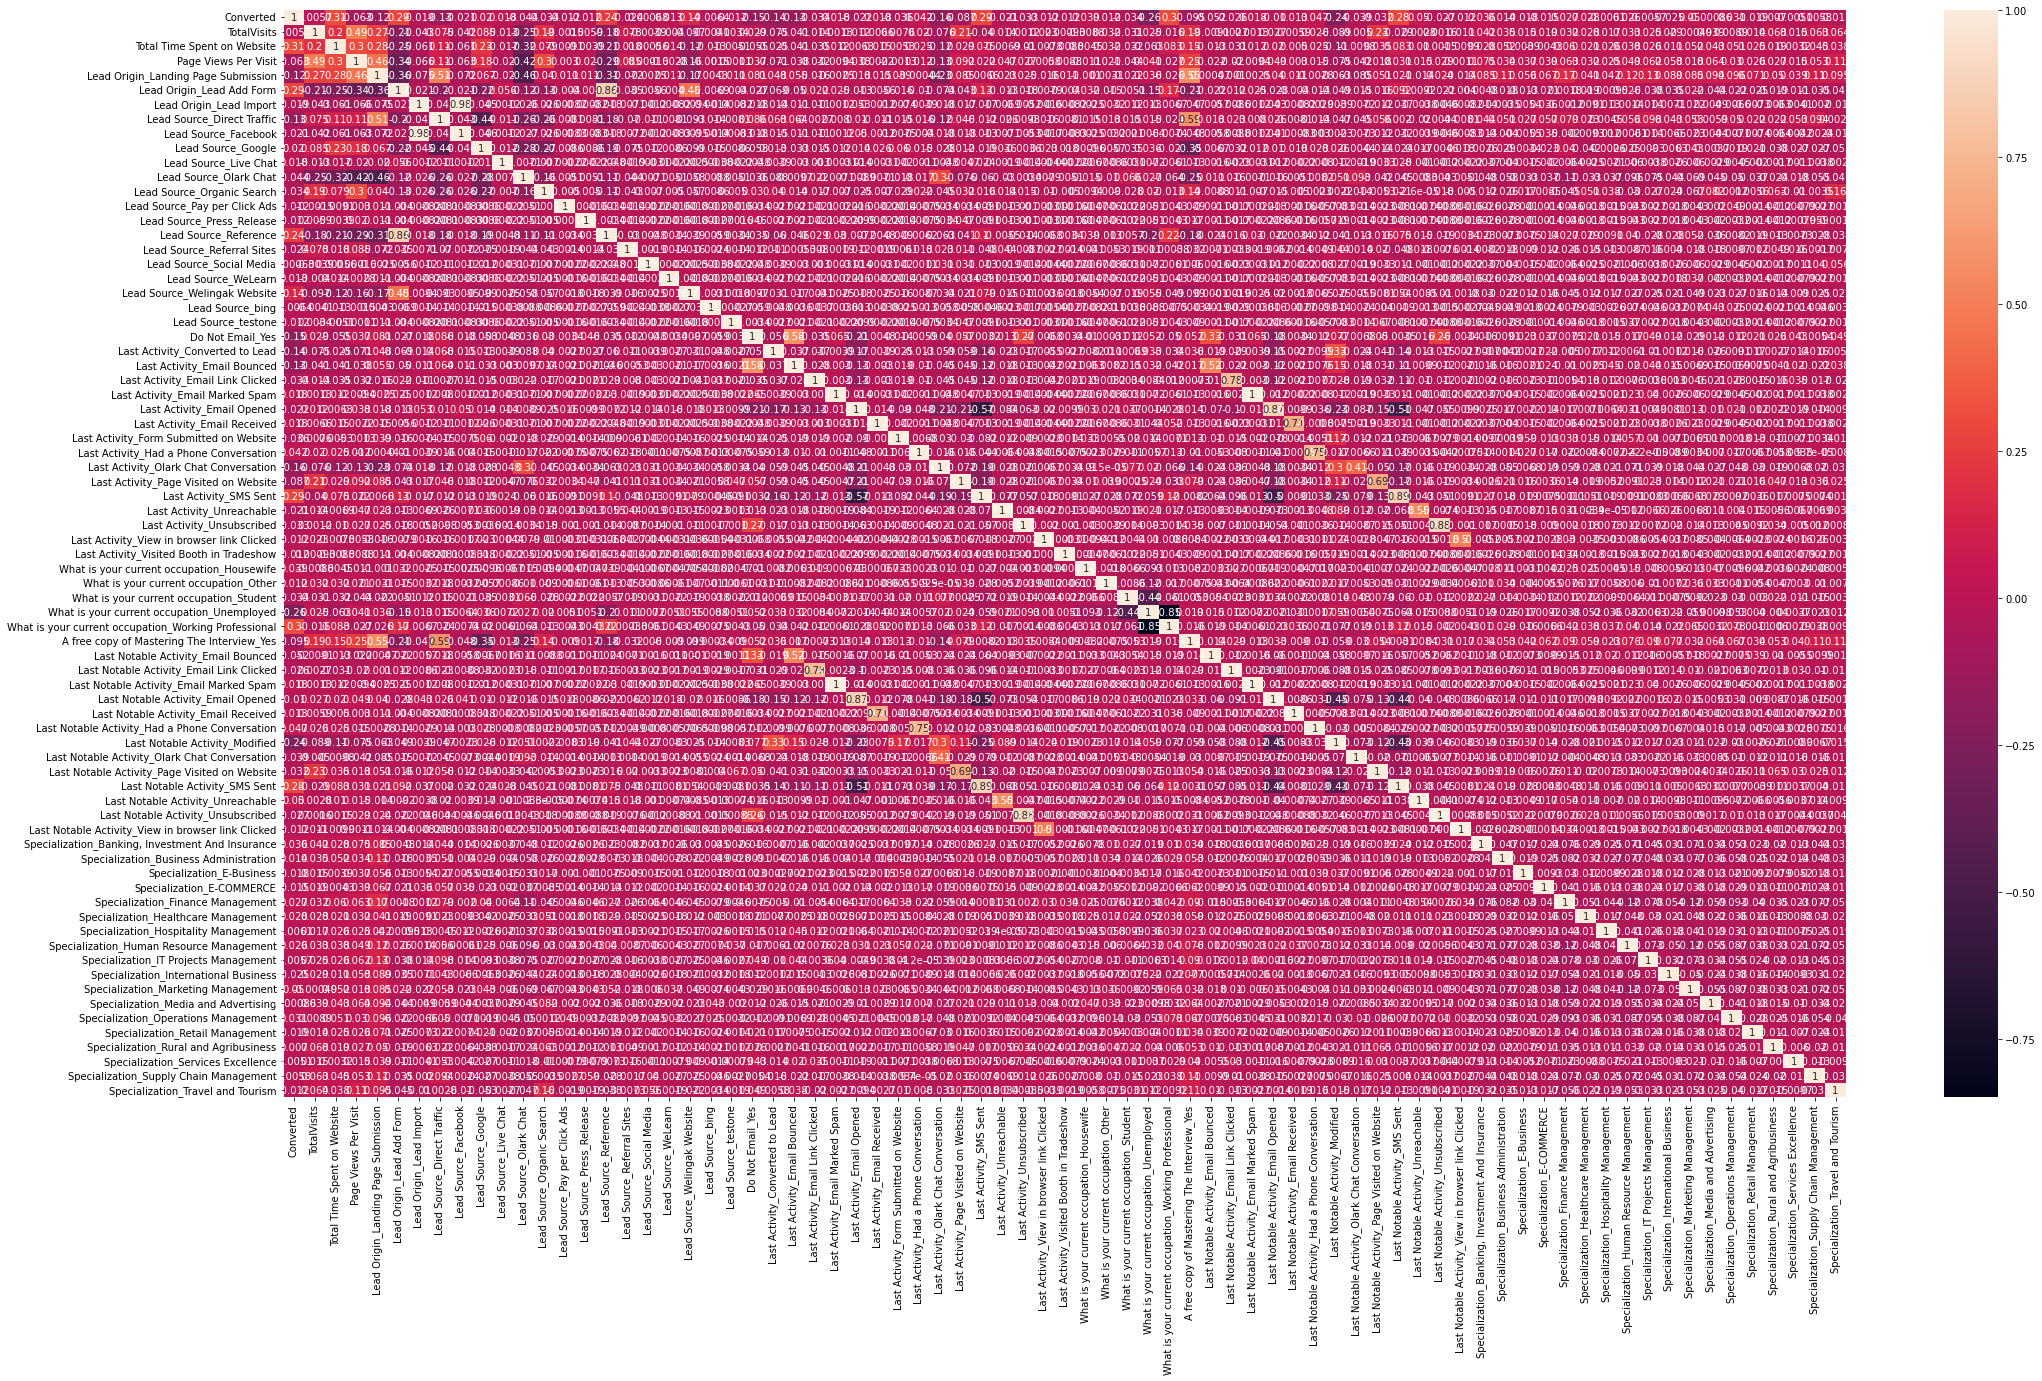

In [45]:
plt.figure(figsize= [35,20])
sns.heatmap(lead_Aj.corr(), annot = True)
plt.show()

Because of large no. of features heatmap is not much usefull, here, thus we will use rfe and vif for for elemenation and correlation as we will be using it further for sure

## <font color = green> 1. Model

Now let's get started making models. As you can see, the dataset has a lot of variables that we are unable to handle. Therefore, the optimal strategy is to use RFE to pick a limited number of features from this pool of variables.

In [46]:
# From sklearn importing logistic_regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [47]:
# Using rfe for selecting 15 significant variables
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)  # Running rfe for 15 variables
rfe= rfe.fit(X_train, y_train)

In [48]:
# lets check which feature variables are selected by rfe
list(zip(X_train.columns,rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 23),
 ('Lead Origin_Landing Page Submission', False, 8),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 52),
 ('Lead Source_Direct Traffic', False, 24),
 ('Lead Source_Facebook', False, 51),
 ('Lead Source_Google', False, 36),
 ('Lead Source_Live Chat', False, 44),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 35),
 ('Lead Source_Pay per Click Ads', False, 43),
 ('Lead Source_Press_Release', False, 53),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 37),
 ('Lead Source_Social Media', False, 58),
 ('Lead Source_WeLearn', False, 42),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 33),
 ('Lead Source_testone', False, 38),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 25),
 ('Last Activity_Email Bounced', False, 4),
 ('Last Activity_Email Link C

In [49]:
col = X_train.columns[rfe.support_]
col

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [50]:
X_train = X_train[col]

*Checking P-value and VIF usning statsmodels* 

In [51]:
# Importing statsmodel library
import statsmodels.api as sm

In [52]:
# Adding constant
X_train_sm = sm.add_constant(X_train)
# fitting the model
logm1 = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2072.8
Date:                Sun, 07 Aug 2022   Deviance:                       4145.5
Time:                        14:34:56   Pearson chi2:                 4.84e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0061      0.600     -1.677      0.094      -2.182       0.170
TotalVisits                                             11.3439      2.682      4.230      0.000       6.088      16.600
Total Time Spent on Website                              4.4312      0.185     23.924      0.000       4.068       4.794
Lead Origin_Lead Add Form                                2.9483      1.191      2.475      0.013       0.614       5.283
Lead Source_Olark Chat                                   1.4584      0.122     11.962      0.000       1.219       1.697
Lead Source_Reference                                    1.2994      1.214      1.070      0.285      -1.080       3.679
Lead Source_Welingak Website                             3.4159      1.558      2.192      0.028       0.362       6.470
Do Not Email_Yes                                        -1.5053      0.193     -7.781      0.000      -1.884      -1.126
Last Activity_Had a Phone Conversation                   1.0397      0.983      1.058      0.290      -0.887       2.966
Last Activity_SMS Sent                                   1.1827      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Housewife               22.6492   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1544      0.630     -1.831      0.067      -2.390       0.081
What is your current occupation_Unemployed              -1.3395      0.594     -2.254      0.024      -2.505      -0.175
What is your current occupation_Working Professional     1.2743      0.623      2.045      0.041       0.053       2.496
Last Notable Activity_Had a Phone Conversation          23.1932   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Unreachable                        2.7868      0.807      3.453      0.001       1.205       4.369
========================================================================================================================
"""

There are numerous variables with p-values higher than 0.05. We'll have to look after them. But let's first take a look at the VIFs.

In [53]:
# Importing Variance_Inflation_Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [54]:
# Creating VIF dataframe 
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2                           Lead Origin_Lead Add Form  84.19
4                               Lead Source_Reference  65.18
5                        Lead Source_Welingak Website  20.03
11         What is your current occupation_Unemployed   3.65
7              Last Activity_Had a Phone Conversation   2.44
13     Last Notable Activity_Had a Phone Conversation   2.43
1                         Total Time Spent on Website   2.38
0                                         TotalVisits   1.62
8                              Last Activity_SMS Sent   1.59
12  What is your current occupation_Working Profes...   1.56
3                              Lead Source_Olark Chat   1.44
6                                    Do Not Email_Yes   1.09
10            What is your current occupation_Student   1.09
9           What is your current occupation_Housewife   1.01
14                  Last Notable Activity_Unreachable   1.01

With the exception of three variables, VIFs appear to be in a good range.
Let's first drop the variable `Lead Source_Reference` since it has a high p-value as well as a high VIF.

In [55]:
X_train.drop('Lead Source_Reference', axis = 1, inplace = True)

## <font color = green> 2. Model

In [56]:
# Building a Model for new sets of varibale
logm2 = sm.GLM(y_train, sm.add_constant(X_train), family= sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2073.2
Date:                Sun, 07 Aug 2022   Deviance:                       4146.5
Time:                        14:34:56   Pearson chi2:                 4.82e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0057      0.600     -1.677      0.094      -2.181       0.170
TotalVisits                                             11.3428      2.682      4.229      0.000       6.086      16.599
Total Time Spent on Website                              4.4312      0.185     23.924      0.000       4.068       4.794
Lead Origin_Lead Add Form                                4.2084      0.259     16.277      0.000       3.702       4.715
Lead Source_Olark Chat                                   1.4583      0.122     11.960      0.000       1.219       1.697
Lead Source_Welingak Website                             2.1557      1.037      2.079      0.038       0.124       4.188
Do Not Email_Yes                                        -1.5036      0.193     -7.779      0.000      -1.882      -1.125
Last Activity_Had a Phone Conversation                   1.0398      0.983      1.058      0.290      -0.887       2.966
Last Activity_SMS Sent                                   1.1827      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Housewife               22.6511   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1537      0.630     -1.830      0.067      -2.389       0.082
What is your current occupation_Unemployed              -1.3401      0.594     -2.255      0.024      -2.505      -0.175
What is your current occupation_Working Professional     1.2748      0.623      2.046      0.041       0.053       2.496
Last Notable Activity_Had a Phone Conversation          23.1934   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Unreachable                        2.7872      0.807      3.454      0.001       1.205       4.369
========================================================================================================================
"""

There are 4 features whose P-value is greater then 0.05, we will treat them accordingly after VIF nspection

In [57]:
# Creating VIF dataframe 
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
10         What is your current occupation_Unemployed  3.65
6              Last Activity_Had a Phone Conversation  2.44
12     Last Notable Activity_Had a Phone Conversation  2.43
1                         Total Time Spent on Website  2.38
2                           Lead Origin_Lead Add Form  1.71
0                                         TotalVisits  1.62
7                              Last Activity_SMS Sent  1.59
11  What is your current occupation_Working Profes...  1.56
3                              Lead Source_Olark Chat  1.44
4                        Lead Source_Welingak Website  1.33
5                                    Do Not Email_Yes  1.09
9             What is your current occupation_Student  1.09
8           What is your current occupation_Housewife  1.01
13                  Last Notable Activity_Unreachable  1.01

All of the VIFs are currently under 5. Therefore, let's discard the results starting with "Last Notable Activity Had a Phone Conversation" that have high p-values.

In [58]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

## <font color = green> 3. Model

In [59]:
# Buliding another model 
logm2 = sm.GLM(y_train, sm.add_constant(X_train), familiy= sm.families.Binomial())
res= logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Gaussian   Df Model:                           13
Link Function:               identity   Scale:                         0.15864
Method:                          IRLS   Log-Likelihood:                -2216.3
Date:                Sun, 07 Aug 2022   Deviance:                       705.49
Time:                        14:34:56   Pearson chi2:                     705.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3303      0.098      3.382      0.001       0.139       0.522
TotalVisits                                              1.3074      0.291      4.486      0.000       0.736       1.879
Total Time Spent on Website                              0.8149      0.027     30.126      0.000       0.762       0.868
Lead Origin_Lead Add Form                                0.6039      0.025     23.742      0.000       0.554       0.654
Lead Source_Olark Chat                                   0.2380      0.019     12.387      0.000       0.200       0.276
Lead Source_Welingak Website                             0.1673      0.047      3.555      0.000       0.075       0.259
Do Not Email_Yes                                        -0.2007      0.024     -8.443      0.000      -0.247      -0.154
Last Activity_Had a Phone Conversation                   0.4150      0.097      4.278      0.000       0.225       0.605
Last Activity_SMS Sent                                   0.2011      0.013     15.551      0.000       0.176       0.226
What is your current occupation_Housewife                0.2655      0.171      1.553      0.121      -0.070       0.601
What is your current occupation_Student                 -0.2175      0.103     -2.109      0.035      -0.420      -0.015
What is your current occupation_Unemployed              -0.2459      0.097     -2.531      0.011      -0.436      -0.056
What is your current occupation_Working Professional     0.0795      0.099      0.805      0.421      -0.114       0.273
Last Notable Activity_Unreachable                        0.4002      0.100      4.000      0.000       0.204       0.596
========================================================================================================================
"""

Dropping 'What is your current occupation_Housewife' as its p-value is greater then 0.05

In [60]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [61]:
# Creating VIF dataframe 
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
9          What is your current occupation_Unemployed  3.64
1                         Total Time Spent on Website  2.37
2                           Lead Origin_Lead Add Form  1.70
0                                         TotalVisits  1.62
7                              Last Activity_SMS Sent  1.59
10  What is your current occupation_Working Profes...  1.56
3                              Lead Source_Olark Chat  1.44
4                        Lead Source_Welingak Website  1.33
5                                    Do Not Email_Yes  1.09
8             What is your current occupation_Student  1.09
6              Last Activity_Had a Phone Conversation  1.01
11                  Last Notable Activity_Unreachable  1.01

Here, All features seems good which has VIF under 0.05

## <font color = green> 4. Model

In [62]:
# Fitting model 
logm4 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2078.3
Date:                Sun, 07 Aug 2022   Deviance:                       4156.7
Time:                        14:34:56   Pearson chi2:                 4.83e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4528      0.554     -0.818      0.413      -1.538       0.632
TotalVisits                                             11.2586      2.672      4.214      0.000       6.023      16.495
Total Time Spent on Website                              4.4217      0.185     23.898      0.000       4.059       4.784
Lead Origin_Lead Add Form                                4.2057      0.258     16.274      0.000       3.699       4.712
Lead Source_Olark Chat                                   1.4530      0.122     11.930      0.000       1.214       1.692
Lead Source_Welingak Website                             2.1541      1.037      2.078      0.038       0.122       4.186
Do Not Email_Yes                                        -1.5063      0.193     -7.785      0.000      -1.886      -1.127
Last Activity_Had a Phone Conversation                   2.7515      0.802      3.432      0.001       1.180       4.323
Last Activity_SMS Sent                                   1.1823      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Student                 -1.7017      0.588     -2.893      0.004      -2.855      -0.549
What is your current occupation_Unemployed              -1.8879      0.550     -3.435      0.001      -2.965      -0.811
What is your current occupation_Working Professional     0.7246      0.581      1.248      0.212      -0.413       1.862
Last Notable Activity_Unreachable                        2.7834      0.807      3.448      0.001       1.201       4.365
========================================================================================================================
"""

Dropping `What is your current occupation_Working Professional` feature

In [63]:
X_train.drop('What is your current occupation_Working Professional', axis = 1, inplace = True)

In [64]:
# Creating VIF dataframe 
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
9   What is your current occupation_Unemployed  2.82
1                  Total Time Spent on Website  2.00
0                                  TotalVisits  1.54
7                       Last Activity_SMS Sent  1.51
2                    Lead Origin_Lead Add Form  1.45
3                       Lead Source_Olark Chat  1.33
4                 Lead Source_Welingak Website  1.30
5                             Do Not Email_Yes  1.08
8      What is your current occupation_Student  1.06
6       Last Activity_Had a Phone Conversation  1.01
10           Last Notable Activity_Unreachable  1.01

## <font color = green> 5. Model

In [65]:
# Building the model again
logm5 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2079.1
Date:                Sun, 07 Aug 2022   Deviance:                       4158.1
Time:                        14:34:56   Pearson chi2:                 4.80e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.2040      0.196      1.043      0.297      -0.179       0.587
TotalVisits                                   11.1489      2.665      4.184      0.000       5.926      16.371
Total Time Spent on Website                    4.4223      0.185     23.899      0.000       4.060       4.785
Lead Origin_Lead Add Form                      4.2051      0.258     16.275      0.000       3.699       4.712
Lead Source_Olark Chat                         1.4526      0.122     11.934      0.000       1.214       1.691
Lead Source_Welingak Website                   2.1526      1.037      2.076      0.038       0.121       4.185
Do Not Email_Yes                              -1.5037      0.193     -7.774      0.000      -1.883      -1.125
Last Activity_Had a Phone Conversation         2.7552      0.802      3.438      0.001       1.184       4.326
Last Activity_SMS Sent                         1.1856      0.082     14.421      0.000       1.024       1.347
What is your current occupation_Student       -2.3578      0.281     -8.392      0.000      -2.908      -1.807
What is your current occupation_Unemployed    -2.5445      0.186    -13.699      0.000      -2.908      -2.180
Last Notable Activity_Unreachable              2.7846      0.807      3.449      0.001       1.202       4.367
==============================================================================================================
"""

The p-values are now all within the acceptable range. Additionally, let's recheck the VIFs in case we missed anything.

In [66]:
# Creating VIF dataframe 
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
9   What is your current occupation_Unemployed  2.82
1                  Total Time Spent on Website  2.00
0                                  TotalVisits  1.54
7                       Last Activity_SMS Sent  1.51
2                    Lead Origin_Lead Add Form  1.45
3                       Lead Source_Olark Chat  1.33
4                 Lead Source_Welingak Website  1.30
5                             Do Not Email_Yes  1.08
8      What is your current occupation_Student  1.06
6       Last Activity_Had a Phone Conversation  1.01
10           Last Notable Activity_Unreachable  1.01

As we observed Above P-value and VIF for features in the both logistic models 4 and 5 is less than 0.05,Thus, we can continue with Model Evaluation

## Model Evaluation
The p-values and VIFs now appear to be sufficient for all the variables. So let's use this last collection of features to create some predictions.

In [67]:
# Using Predict for prediction
y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

8003    0.300117
218     0.142002
4171    0.127629
4037    0.291558
3660    0.954795
207     0.194426
2044    0.178073
6411    0.949460
6498    0.075995
2085    0.982316
dtype: float64

In [68]:
# Reshaping this to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.30011695, 0.14200165, 0.12762885, 0.29155814, 0.95479546,
       0.19442563, 0.17807328, 0.94946006, 0.07599465, 0.98231619])

#### Constructing a dataframe that contains the actual conversion flag and the anticipated probabilities

In [69]:
# Creating a new dataframe with the real conversion flag and the odds that the model predicts
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

Converted  Conversion_Prob
0          0         0.300117
1          0         0.142002
2          1         0.127629
3          1         0.291558
4          1         0.954795

#### Adding new column to dataframe `Predicted` for Conversion_Prob > 0.05 is 1 else 0

In [70]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [71]:
# lets check its head
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted
0          0         0.300117          0
1          0         0.142002          0
2          1         0.127629          0
3          1         0.291558          0
4          1         0.954795          1

It's time to assess the model now that you have the probabilities and have used them to make conversion predictions.

In [72]:
# Importing Metrics
from sklearn import metrics

In [73]:
# lets check confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[1929  383]
 [ 560 1589]]


In [74]:
#lets check Accuracy 
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7886124187401928

In [75]:
# Evaluating other metrics as well
TP = confusion[1,1] # True +ve
TN = confusion[0,0] # True -ve
FP = confusion[0,1] # False +ve
FN = confusion[1,0] # False -ve

In [76]:
# Sensitivity
TP/float(TP+FN)

0.739413680781759

In [77]:
# Specificity
TN/float(TN+FP)

0.8343425605536332

## Choosing the Best Cutoff
___

Now, the value of 0.5 was chosen at random to check the model's performance. But you must optimise the threshold if you want decent outcomes. So let's first plot a ROC curve to determine the AUC.

In [78]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [79]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

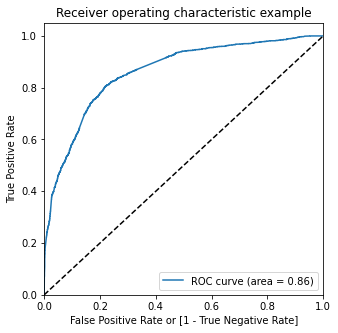

In [80]:
# ROC Curve
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The ROC's 0.86 area under the curve is a very respectable value. So it appears that we have a sound model. To determine the best cutoff point, let's additionally examine the tradeoff between sensitivity and specificity.

In [81]:
# Let's make columns with various cutoffs for likelihood.
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0         0.300117          0    1    1    1    1    0    0    0   
1          0         0.142002          0    1    1    0    0    0    0    0   
2          1         0.127629          0    1    1    0    0    0    0    0   
3          1         0.291558          0    1    1    1    0    0    0    0   
4          1         0.954795          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    1    1    1

In [82]:
# Let's make a dataframe to display the accuracy, sensitivity, and specificity values at various probabilities.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.481731  1.000000  0.000000
0.1   0.1  0.527012  0.994416  0.092561
0.2   0.2  0.698274  0.944160  0.469723
0.3   0.3  0.767541  0.865984  0.676038
0.4   0.4  0.791975  0.810610  0.774654
0.5   0.5  0.788612  0.739414  0.834343
0.6   0.6  0.757229  0.624011  0.881055
0.7   0.7  0.735037  0.543509  0.913062
0.8   0.8  0.711500  0.453234  0.951557
0.9   0.9  0.644026  0.279665  0.982699


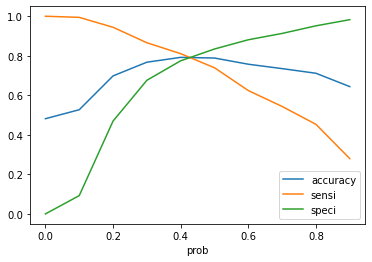

In [83]:
# Let's also plot it.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As you can see, the three measures are at their best around a value of 0.42. Now let's decide on 0.42 as our threshold.

In [84]:
# Adding 'final_predicted' column in Dataframe with 0.42 cutoff
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0         0.300117          0    1    1    1    1    0    0    0   
1          0         0.142002          0    1    1    0    0    0    0    0   
2          1         0.127629          0    1    1    0    0    0    0    0   
3          1         0.291558          0    1    1    1    0    0    0    0   
4          1         0.954795          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    0    0    0                0  
2    0    0    0                0  
3    0    0    0                0  
4    1    1    1                1

In [85]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7908540685944856

In [86]:
# Let's re-build the confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1823,  489],
       [ 444, 1705]], dtype=int64)

In [87]:
# Let's assess the additional metrics.
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [88]:
# Sensitivity
TP/float(TP+FN)

0.793392275476966

In [89]:
# Specificity
TN/float(TN+FP)

0.7884948096885813

This threshold seems to be valid!

## Precision-Recall View
---

Additionally, let's construct the training model utilising the precision-recall view.

In [90]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[1929,  383],
       [ 560, 1589]], dtype=int64)

### **Precision** <br>

TP/TP+FP

In [91]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8057809330628803

**Recall**

TP/(TP+FN)

In [92]:
confusion[1,1]/(confusion[1,1]+ confusion[1,0])

0.739413680781759

### Precision and recall tradeoff

In [93]:
from sklearn.metrics import precision_recall_curve

In [94]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4456    1
 4457    0
 4458    0
 4459    0
 4460    0
 Name: Converted, Length: 4461, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 4456    1
 4457    1
 4458    1
 4459    0
 4460    0
 Name: Predicted, Length: 4461, dtype: int64)

In [95]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

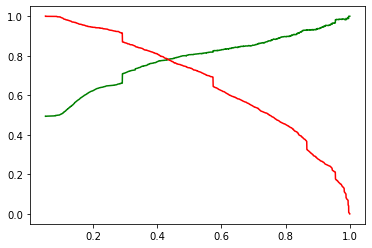

In [96]:
# plotting graph for precsion and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [97]:
# Adding 'final_predicted' column in df with 0.44 cut off
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0         0.300117          0    1    1    1    1    0    0    0   
1          0         0.142002          0    1    1    0    0    0    0    0   
2          1         0.127629          0    1    1    0    0    0    0    0   
3          1         0.291558          0    1    1    1    0    0    0    0   
4          1         0.954795          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    0    0    0                0  
2    0    0    0                0  
3    0    0    0                0  
4    1    1    1                1

#### Checking All Metrics

In [98]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7895090786819099

In [99]:
# Confusion Matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1852,  460],
       [ 479, 1670]], dtype=int64)

In [100]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [101]:
# Precision
TP/float(TP+FP)

0.784037558685446

In [102]:
# Recall
TP/float(TP+FN)

0.7771056305258259

This cutoff seems to be appropriate.

## Predicting Results from the Test Set
---

In [103]:
#Scale the test set using only "transform" 
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit',
                                                                                                          'Total Time Spent on Website']])

In [104]:
# Also choose the columns from X train for X test.
X_test = X_test[col]
X_test.head()

TotalVisits  Total Time Spent on Website  Lead Origin_Lead Add Form  \
4771     0.000000                     0.000000                          1   
6122     0.027888                     0.029049                          0   
9202     0.015936                     0.416813                          0   
6570     0.011952                     0.378961                          0   
2668     0.031873                     0.395246                          0   

      Lead Source_Olark Chat  Lead Source_Reference  \
4771                       0                      1   
6122                       0                      0   
9202                       0                      0   
6570                       0                      0   
2668                       0                      0   

      Lead Source_Welingak Website  Do Not Email_Yes  \
4771                             0                 0   
6122                             0                 0   
9202                             0                 0   
6570                             0                 1   
2668                             0                 0   

      Last Activity_Had a Phone Conversation  Last Activity_SMS Sent  \
4771                                       0                       1   
6122                                       0                       0   
9202                                       0                       1   
6570                                       0                       1   
2668                                       0                       1   

      What is your current occupation_Housewife  \
4771                                          0   
6122                                          0   
9202                                          0   
6570                                          0   
2668                                          0   

      What is your current occupation_Student  \
4771                                        0   
6122                                        0   
9202                                        0   
6570                                        0   
2668                                        0   

      What is your current occupation_Unemployed  \
4771                                           0   
6122                                           1   
9202                                           1   
6570                                           1   
2668                                           1   

      What is your current occupation_Working Professional  \
4771                                                  1      
6122                                                  0      
9202                                                  0      
6570                                                  0      
2668                                                  0      

      Last Notable Activity_Had a Phone Conversation  \
4771                                               0   
6122                                               0   
9202                                               0   
6570                                               0   
2668                                               0   

      Last Notable Activity_Unreachable  
4771                                  0  
6122                                  0  
9202                                  0  
6570                                  0  
2668                                  0

In [105]:
# Updating X test with a constant.
X_test_sm = sm.add_constant(X_test[col])
X_test_sm.head()

const  TotalVisits  Total Time Spent on Website  \
4771    1.0     0.000000                     0.000000   
6122    1.0     0.027888                     0.029049   
9202    1.0     0.015936                     0.416813   
6570    1.0     0.011952                     0.378961   
2668    1.0     0.031873                     0.395246   

      Lead Origin_Lead Add Form  Lead Source_Olark Chat  \
4771                          1                       0   
6122                          0                       0   
9202                          0                       0   
6570                          0                       0   
2668                          0                       0   

      Lead Source_Reference  Lead Source_Welingak Website  Do Not Email_Yes  \
4771                      1                             0                 0   
6122                      0                             0                 0   
9202                      0                             0                 0   
6570                      0                             0                 1   
2668                      0                             0                 0   

      Last Activity_Had a Phone Conversation  Last Activity_SMS Sent  \
4771                                       0                       1   
6122                                       0                       0   
9202                                       0                       1   
6570                                       0                       1   
2668                                       0                       1   

      What is your current occupation_Housewife  \
4771                                          0   
6122                                          0   
9202                                          0   
6570                                          0   
2668                                          0   

      What is your current occupation_Student  \
4771                                        0   
6122                                        0   
9202                                        0   
6570                                        0   
2668                                        0   

      What is your current occupation_Unemployed  \
4771                                           0   
6122                                           1   
9202                                           1   
6570                                           1   
2668                                           1   

      What is your current occupation_Working Professional  \
4771                                                  1      
6122                                                  0      
9202                                                  0      
6570                                                  0      
2668                                                  0      

      Last Notable Activity_Had a Phone Conversation  \
4771                                               0   
6122                                               0   
9202                                               0   
6570                                               0   
2668                                               0   

      Last Notable Activity_Unreachable  
4771                                  0  
6122                                  0  
9202                                  0  
6570                                  0  
2668                                  0

In [106]:
# Also remove the unnecessary columns from X test.
X_test.drop(['Lead Source_Reference', 'What is your current occupation_Housewife', 
             'What is your current occupation_Working Professional', 'Last Notable Activity_Had a Phone Conversation'], 1, inplace = True)

In [107]:
# Predict the test set and save the results in the variable "y_test_pred
y_test_pred = res.predict(sm.add_constant(X_test))
y_test_pred[:10]

4771    0.996296
6122    0.129992
9202    0.703937
6570    0.299564
2668    0.720796
4233    0.792250
3368    0.704038
9091    0.464521
5972    0.282978
3631    0.786460
dtype: float64

In [108]:
# Creating a dataframe from y pred
y_pred1 = pd.DataFrame(y_test_pred)
y_pred1.head()

0
4771  0.996296
6122  0.129992
9202  0.703937
6570  0.299564
2668  0.720796

In [109]:
# Making y test into a dataframe.
y_test_Df = pd.DataFrame(y_test)
y_test_Df.head()

Converted
4771          1
6122          0
9202          0
6570          1
2668          1

In [110]:
# Remove the index from each dataframes and append them together.
y_pred1.reset_index(drop=True, inplace=True)
y_test_Df.reset_index(drop=True, inplace=True)
# appending these 2 Dataframe
y_pred_final = pd.concat([y_test_Df, y_pred1],axis=1)
# final dataframes head
y_pred_final.head()

Converted         0
0          1  0.996296
1          0  0.129992
2          0  0.703937
3          1  0.299564
4          1  0.720796

In [111]:
# Change the column's name.
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

Converted  Conversion_Prob
0          1         0.996296
1          0         0.129992
2          0         0.703937
3          1         0.299564
4          1         0.720796

In [112]:
# Use 0.44 as the cutoff for making predictions for the test set.
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)
y_pred_final.head()

Converted  Conversion_Prob  final_predicted
0          1         0.996296                1
1          0         0.129992                0
2          0         0.703937                1
3          1         0.299564                0
4          1         0.720796                1

In [113]:
# Lets check Accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7866108786610879

In [114]:
# confusion Matrix
confusion3 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion3

array([[801, 195],
       [213, 703]], dtype=int64)

In [115]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [116]:
# Precision
TP/(TP+FP)

0.7828507795100222

In [117]:
# Recall
TP/(TP+FN)

0.767467248908297

## <font color = green> Summary
 


Many leads are generated in the first stage (top), but few of them turn into paying clients in the second stage. To increase lead conversion, we must properly nurture the potential leads during the middle stage (e.g., by educating the leads about the product and maintaining ongoing communication).
First, we have to sort out the best prospects from the leads we have generated. 'TotalVisits' , 'Total Time Spent on Website' , 'Page Views Per Visit' which contribute most towards the probability of a lead getting converted.
Then, we must keep a list of leads handy so that we can inform them about new courses, services, job offers and future higher studies. we have to Monitor each lead carefully so that we can tailor the information we send to them. 
Carefully provide job offerings, information or courses that suits best according to the interest of the leads. A proper plan to chart the needs of each lead will go a long way to capture the leads as prospects.
We have to focus on converted leads. Hold question-answer sessions with leads to extract the right information we need about them. Make further inquiries and appointments with the leads to determine their intention and mentality to join online courses. 
We need to pay attention to leads that have been converted. Engage leads in question-and-answer sessions to gather the pertinent data you require about them. To find out if the leads want to enroll in online courses, make more enquiries and appointments with them.